In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import mglearn
%matplotlib inline

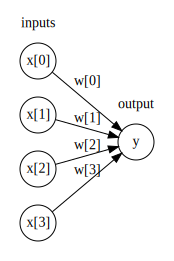

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

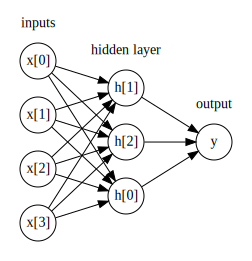

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x),tanh(x)')

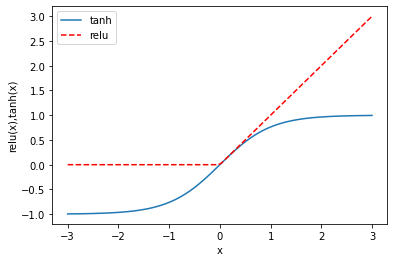

In [8]:
line=np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label='tanh')
plt.plot(line,np.maximum(line,0),'r--',label='relu')
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x),tanh(x)")

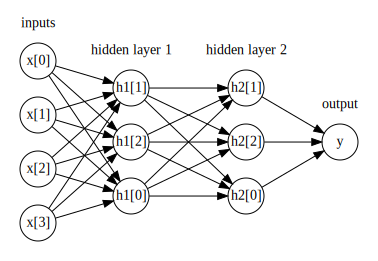

In [9]:
mglearn.plots.plot_two_hidden_layer_graph()

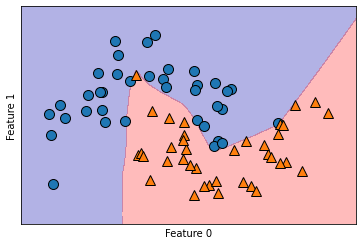

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

mlp=MLPClassifier(solver="lbfgs",random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

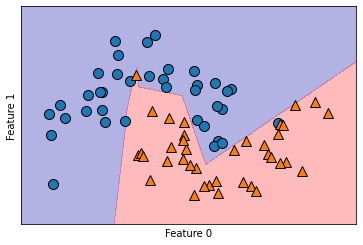

In [13]:
mlp=MLPClassifier(solver="lbfgs",random_state=0,hidden_layer_sizes=[10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

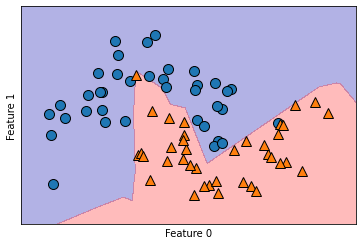

In [14]:
mlp=MLPClassifier(solver="lbfgs",random_state=0,hidden_layer_sizes=[10,10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

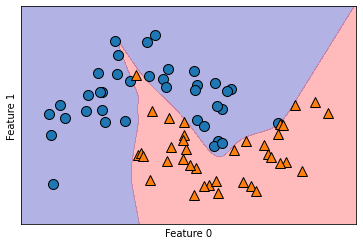

In [15]:
mlp=MLPClassifier(solver="lbfgs",random_state=0,hidden_layer_sizes=[10,10],activation='tanh').fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

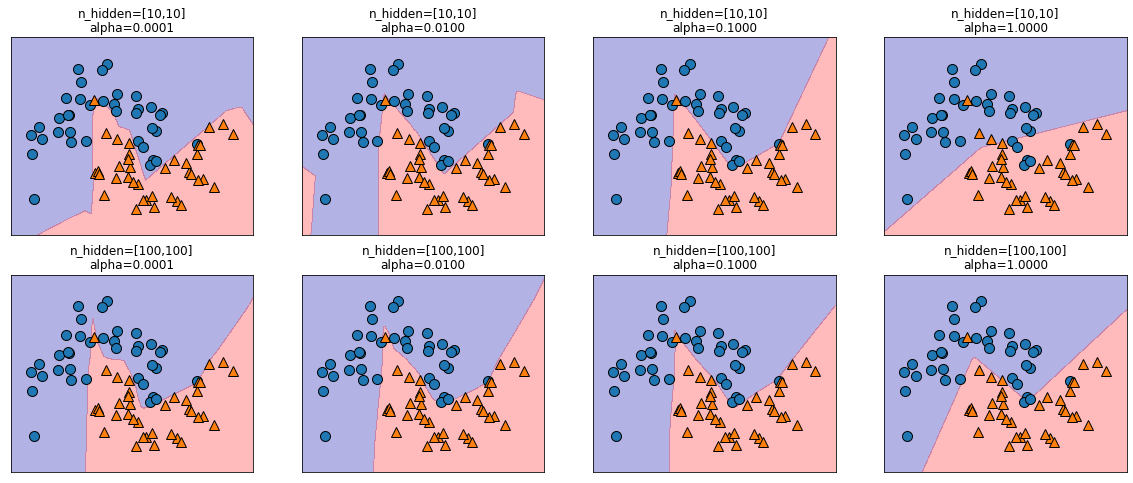

In [17]:
fig,axes=plt.subplots(2,4,figsize=(20,8))
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax, alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:,.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha))



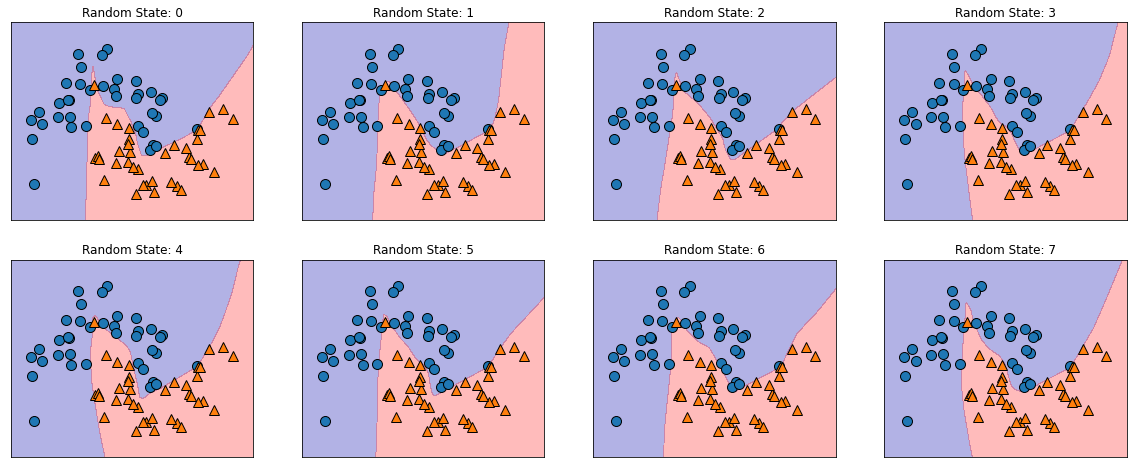

In [19]:
fig,axes=plt.subplots(2,4,figsize=(20,8))
for i,ax in enumerate(axes.ravel()):
   mlp=MLPClassifier(solver='lbfgs',random_state=i,hidden_layer_sizes=[100,100])
   mlp.fit(X_train,y_train)
   mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3,ax=ax)
   mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
   ax.set_title("Random State: {}".format(i))

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [23]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print("Training Accuracy:{:.2f}".format(mlp.score(X_train,y_train)))
print("Testing Accuracy:{:.2f}".format(mlp.score(X_test,y_test)))

Training Accuracy:0.94
Testing Accuracy:0.92


In [24]:
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)

X_train_scaled=(X_train-mean_on_train)/std_on_train
X_test_scaled=(X_test-mean_on_train)/std_on_train

mlp=MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)

print("Training Accuracy:{:.2f}".format(mlp.score(X_train_scaled,y_train)))
print("Testing Accuracy:{:.2f}".format(mlp.score(X_test_scaled,y_test)))

Training Accuracy:0.99
Testing Accuracy:0.97


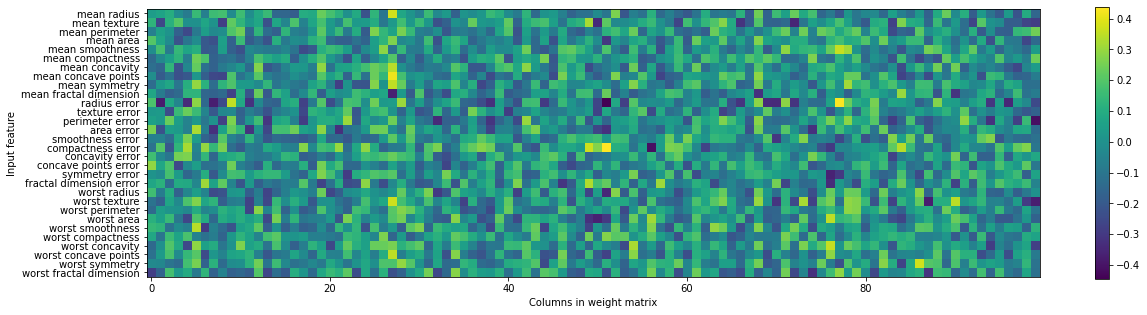

In [25]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()